In [ ]:
import sys

sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/PI_paper/kgbuilder')

In [ ]:
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/PI_paper/kgbuilder/')

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.8/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/MyDrive/Colab Notebooks/PI_paper/kgbuilder']

In [ ]:
!pip install rdflib
!pip install datashader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59439 sha256=d53a092c2aa4fd3cb56a6ef093aeee1e9bdb98f5a799c2cabaf33e2fc249111a
  Stored in directory: /root/.cache/pip/wheels/6d/79/c4/c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape


In [ ]:
from rdflib import Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

import requests

import pandas as pd

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle


from itertools import chain

import scipy

In [ ]:
import os

In [ ]:
os.chdir('gdrive/MyDrive/Colab Notebooks/PI_paper')

In [ ]:
os.listdir()

['test_library_Flora.ipynb',
 'queer_people_to_graph_dist1.csv',
 'graph_to_queer_people_dist1.csv',
 'kgbuilder']

In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/PI_paper'

In [ ]:
os.chdir("..")

In [ ]:
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/PI_paper'

In [ ]:
os.listdir()

['select_nodes.py',
 'queries.py',
 'ontology.py',
 'utils.py',
 'visuals.py',
 '__init__.py',
 '__pycache__']

In [ ]:
from utils import *

In [ ]:
prune_policy={'remove_deadend':True, 'remove_isolated':True}

G=star_merging_pipeline(15, prune_policy)

[rdflib.term.URIRef('http://wikiba.se/ontology#String'), rdflib.term.URIRef('http://wikiba.se/ontology#Statement'), rdflib.term.Literal('end cause', lang='en'), rdflib.term.Literal('Nazi Germany', lang='en'), rdflib.term.Literal('Twitter user numeric ID', lang='en'), rdflib.term.URIRef('http://wikiba.se/ontology#Property'), rdflib.term.URIRef('http://wikiba.se/ontology#BestRank'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'), rdflib.term.Literal('DFK Paris person ID', lang='en'), rdflib.term.Literal('position held', lang='en'), rdflib.term.URIRef('http://wikiba.se/ontology#ExternalId'), rdflib.term.Literal('award rationale', lang='en'), rdflib.term.URIRef('https://commons.wikimedia.org/'), rdflib.term.Literal('1.0.0'), rdflib.term.URIRef('http://wikiba.se/ontology#NormalRank'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'), rdflib.term.Literal('number of children', lang='en'), rdflib.term.Literal('redirect', lang='en'), rdflib.term.Literal('archive date',

In [ ]:
pd.options.display.max_rows = None

In [ ]:
from visuals import *

In [ ]:
image=create_plot_graph_force_directed(G)

In [ ]:
type(image)

datashader.transfer_functions.Image


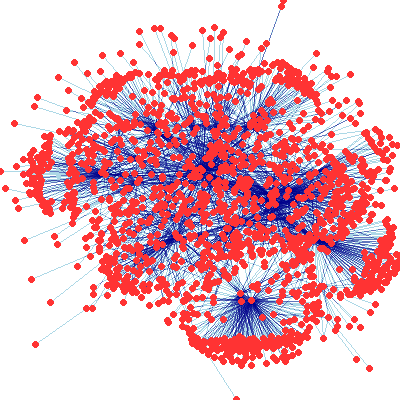

In [ ]:
tf.Images(image).cols(1)

# Testing and visualising SPARQL requests graphs

## Queer people in edges

In [ ]:
def graph_statistics(G):
  print(type(G))
  print(f"number of nodes : {G.number_of_nodes()}")
  print(f"number of edges : {G.number_of_edges()}")

In [ ]:
df = pd.read_csv("graph_to_queer_people_dist1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176356 entries, 0 to 176355
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   subject    176356 non-null  object 
 1   predicate  176356 non-null  object 
 2   object     176356 non-null  object 
 3   context    0 non-null       float64
dtypes: float64(1), object(3)
memory usage: 5.4+ MB


In [ ]:
df["object"].nunique()

7281

In [ ]:
df["predicate"].nunique()

521

In [ ]:
df["subject"].nunique()

168923

In [ ]:
df["predicate"].value_counts()

http://schema.org/about                         61114
http://www.wikidata.org/prop/statement/P161     10534
http://www.wikidata.org/prop/direct/P161        10484
http://www.wikidata.org/prop/statement/P50       8384
http://www.wikidata.org/prop/direct/P50          8358
                                                ...  
http://www.wikidata.org/prop/qualifier/P859         1
http://www.wikidata.org/prop/qualifier/P287         1
http://www.wikidata.org/prop/qualifier/P40          1
http://www.wikidata.org/prop/statement/P69          1
http://www.wikidata.org/prop/statement/P1382        1
Name: predicate, Length: 521, dtype: int64

In [ ]:
G = nx.from_pandas_edgelist(df, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.MultiGraph)

In [ ]:
Gbi = nx.from_pandas_edgelist(df, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)

In [ ]:
Gbi.number_of_nodes()

175695

In [ ]:
Gbi.number_of_edges()

172630

In [ ]:
nx.density(Gbi)

5.59242202849005e-06

In [ ]:
prune_isolated_nodes(Gbi)
print(f"after isolated_nodes : \n\
  number of nodes {Gbi.number_of_nodes()}\n\
  number of edges {Gbi.number_of_edges()}")

[]
after isolated_nodes : 
  number of nodes 175695
  number of edges 172630


### dedensify the graph

In [ ]:
nonexp_graph, compression_nodes = nx.summarization.dedensify(
    Gbi, threshold=30, copy=False
)
print(f"number of compression nodes : {len(compression_nodes)}")


number of compression nodes : 0


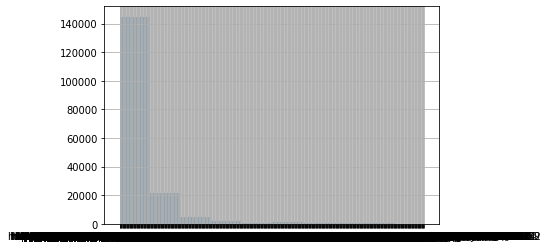

In [ ]:
df["predicate"].hist()

In [ ]:
df["predicate"].value_counts().quantile()

7.0

In [ ]:
df["predicate"].value_counts().quantile(q=0.75)

50.0

In [ ]:
df["predicate"].value_counts().quantile(q=0.25)

2.0

In [ ]:
Gbi = nx.from_pandas_edgelist(df, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)
nonexp_graph, compression_nodes = nx.summarization.dedensify(
    Gbi, threshold=30, copy=False
)
print(f"number of compression nodes : {len(compression_nodes)}")

number of compression nodes : 91


In [ ]:
compression_nodes

{'http://www.wikidata.org/entity/Q109598http://www.wikidata.org/entity/Q163079',
 'http://www.wikidata.org/entity/Q115735http://www.wikidata.org/entity/Q9544977http://www.wikidata.org/entity/Q9545711',
 'http://www.wikidata.org/entity/Q1181049http://www.wikidata.org/entity/Q169982',
 'http://www.wikidata.org/entity/Q1190037http://www.wikidata.org/entity/Q28921867',
 'http://www.wikidata.org/entity/Q1190037http://www.wikidata.org/entity/Q7801308http://www.wikidata.org/entity/Q28921867',
 'http://www.wikidata.org/entity/Q126599http://www.wikidata.org/entity/Q361336http://www.wikidata.org/entity/Q355168',
 'http://www.wikidata.org/entity/Q126599http://www.wikidata.org/entity/Q723057',
 'http://www.wikidata.org/entity/Q128799http://www.wikidata.org/entity/Q453987',
 'http://www.wikidata.org/entity/Q130311http://www.wikidata.org/entity/Q2808',
 'http://www.wikidata.org/entity/Q134262http://www.wikidata.org/entity/Q447433',
 'http://www.wikidata.org/entity/Q13888http://www.wikidata.org/entit

In [ ]:
graph_statistics(nonexp_graph)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 175786
number of edges : 172216


In [ ]:
graph_statistics(Gbi)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 175786
number of edges : 172216


In [ ]:
prune_dead_end(nonexp_graph)

In [ ]:
graph_statistics(nonexp_graph)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 6403
number of edges : 760


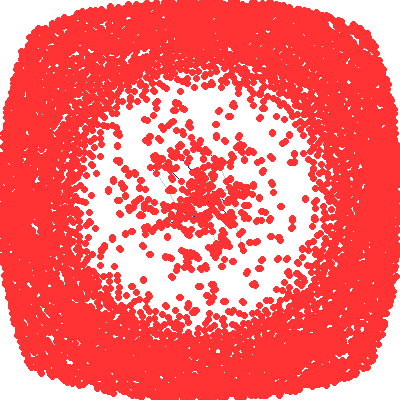

In [ ]:
create_plot_graph_force_directed(nonexp_graph)

In [ ]:
## get the central nodes

In [ ]:
from select_nodes import *

In [ ]:
top_n_degree_nodes(Gbi, 15)

['http://www.wikidata.org/entity/Q541579',
 'http://www.wikidata.org/entity/Q483325',
 'http://www.wikidata.org/entity/Q34782',
 'http://www.wikidata.org/entity/Q7634236',
 'http://www.wikidata.org/entity/Q57322http://www.wikidata.org/entity/Q8863http://www.wikidata.org/entity/Q60426http://www.wikidata.org/entity/Q86294http://www.wikidata.org/entity/Q97332http://www.wikidata.org/entity/Q58284',
 'http://www.wikidata.org/entity/Q6162127',
 'http://www.wikidata.org/entity/Q257442',
 'http://www.wikidata.org/entity/Q17036829',
 'http://www.wikidata.org/entity/Q230765',
 'http://www.wikidata.org/entity/Q1566335',
 'http://www.wikidata.org/entity/Q40909',
 'http://www.wikidata.org/entity/Q350722',
 'http://www.wikidata.org/entity/Q4388897',
 'http://www.wikidata.org/entity/Q5383',
 'http://www.wikidata.org/entity/Q77035']

In [ ]:
Gbi = nx.from_pandas_edgelist(df, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)
graph_statistics(Gbi)
prune_dead_end(Gbi)
graph_statistics(Gbi)


<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 175695
number of edges : 172630
<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 6312
number of edges : 553


In [ ]:
top_n_degree_nodes(G, 20)

['http://www.wikidata.org/entity/Q5603',
 'http://www.wikidata.org/entity/Q5383',
 'http://www.wikidata.org/entity/Q155626',
 'http://www.wikidata.org/entity/Q1192',
 'http://www.wikidata.org/entity/Q2808',
 'http://www.wikidata.org/entity/Q496604',
 'http://www.wikidata.org/entity/Q1728820',
 'http://www.wikidata.org/entity/Q7315',
 'http://www.wikidata.org/entity/Q275628',
 'http://www.wikidata.org/entity/Q19848',
 'http://www.wikidata.org/entity/Q170342',
 'http://www.wikidata.org/entity/Q723057',
 'http://www.wikidata.org/entity/Q30875',
 'http://www.wikidata.org/entity/Q41408',
 'http://www.wikidata.org/entity/Q4235',
 'http://www.wikidata.org/entity/Q150767',
 'http://www.wikidata.org/entity/Q42493',
 'http://www.wikidata.org/entity/Q15869',
 'http://www.wikidata.org/entity/Q163079',
 'http://www.wikidata.org/entity/Q33550']

In [ ]:
def last_n_degree_nodes(G, n):
    degree_dict = dict(G.degree())
    sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=False)
    last_n_nodes = [node for node, degree in sorted_degree[:n]]
    return last_n_nodes
last_n_degree_nodes(G, 20)

['https://fr.wikipedia.org/wiki/Fran%C3%A7ois_Portzer',
 'http://www.wikidata.org/entity/statement/Q15075310-8a79737c-4d52-525f-8321-476548c73d27',
 'http://www.wikidata.org/entity/Q15075310',
 'http://www.wikidata.org/entity/Q4618060',
 'http://www.wikidata.org/entity/statement/Q201687-D22E52E6-416B-49D1-90B9-A9798948928F',
 'http://www.wikidata.org/entity/statement/Q115906303-612AED31-C962-41C2-A987-A550A9BB74CD',
 'http://www.wikidata.org/entity/statement/Q115906612-72E36060-6D13-4333-9C43-C32124C8F5C3',
 'http://www.wikidata.org/entity/statement/Q115906967-C0E75E8A-6911-4AEF-BF75-4B4CDE88135C',
 'http://www.wikidata.org/entity/Q626235',
 'http://www.wikidata.org/entity/statement/Q103871363-ED27C857-90A6-4086-A744-30B1C66B10F5',
 'http://www.wikidata.org/entity/Q63526872',
 'http://www.wikidata.org/entity/Q108298120',
 'http://www.wikidata.org/entity/Q103871363',
 'http://www.wikidata.org/entity/Q19067064',
 'http://www.wikidata.org/entity/Q19084448',
 'http://www.wikidata.org/entit

## LIMIT à 250

In [ ]:
df250 = pd.read_csv("out_limit250.csv")

In [ ]:
df250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    250 non-null    object 
 1   predicate  250 non-null    object 
 2   object     250 non-null    object 
 3   context    0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 7.9+ KB


In [ ]:
df250["subject"].unique()

array(['http://www.wikidata.org/entity/Q12857',
       'http://www.wikidata.org/entity/Q17141'], dtype=object)

# LIMIT à 5000


In [ ]:
df5000 = pd.read_csv("out_limit5000.csv")
df5000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    5000 non-null   object 
 1   predicate  5000 non-null   object 
 2   object     5000 non-null   object 
 3   context    0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [ ]:
df5000["subject"].nunique()

31

## LIMIT à 10k

In [ ]:
df10k = pd.read_csv("out_limit10k.csv")
df10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    10000 non-null  object 
 1   predicate  10000 non-null  object 
 2   object     10000 non-null  object 
 3   context    0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df10k["subject"].nunique()

69

In [ ]:
G10k = nx.from_pandas_edgelist(df10k, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)

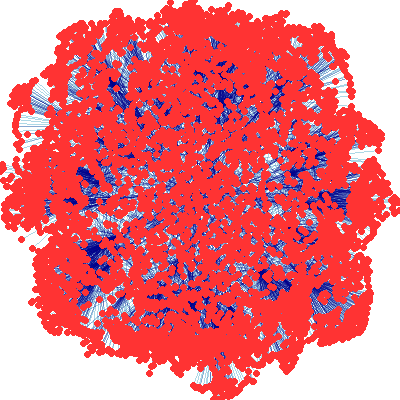

In [ ]:
create_plot_graph_force_directed(G10k)

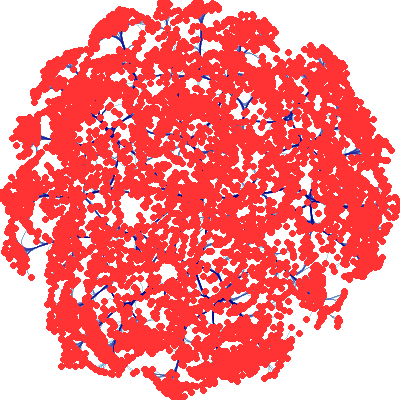

In [ ]:
def create_plot_graph_force_directed_bundled(G):
    # convert the graph labels to integers
    g=convert_to_int_labels(nx.DiGraph(G))

    # create a dataframe of nodes with a 'name' column
    nodes = pd.DataFrame([str(i) for i in g.nodes], columns=['name'])
    # create a list of edges
    ledge=[]
    for u,v in g.edges:
        ledge.append([u,v])
    # create a dataframe of edges with 'source' and 'target' columns
    edges = pd.DataFrame(ledge,columns=['source', 'target'])

    # create a force-directed layout of the graph
    forcedirected = forceatlas2_layout(nodes, edges)

    # plot the force-directed graph
    force_graph = graphplot(forcedirected, hammer_bundle(forcedirected,edges), "Force-directed, bundled") 
    
    return force_graph

create_plot_graph_force_directed_bundled(G10k)

In [ ]:
prune_dead_end(G10k)

In [ ]:
G10k

ValueError: ignored

## Retour sur le graphe

In [ ]:
prune_dead_end(Gbi)

In [ ]:
prune_isolated_nodes(Gbi)

['http://www.wikidata.org/entity/Q3085601', 'http://www.wikidata.org/entity/Q18724', 'http://www.wikidata.org/entity/Q17141', 'http://www.wikidata.org/entity/Q19154', 'http://www.wikidata.org/entity/Q12857', 'http://www.wikidata.org/entity/Q193102', 'http://www.wikidata.org/entity/Q61429', 'http://www.wikidata.org/entity/Q125037', 'http://www.wikidata.org/entity/Q106673', 'http://www.wikidata.org/entity/Q26668', 'http://www.wikidata.org/entity/Q166312', 'http://www.wikidata.org/entity/Q2483405', 'http://www.wikidata.org/entity/Q2484404', 'http://www.wikidata.org/entity/Q2483662', 'http://www.wikidata.org/entity/Q2452637', 'http://www.wikidata.org/entity/Q56014', 'http://www.wikidata.org/entity/Q57152', 'http://www.wikidata.org/entity/Q256164', 'http://www.wikidata.org/entity/Q177011', 'http://www.wikidata.org/entity/Q51448', 'http://www.wikidata.org/entity/Q55171', 'http://www.wikidata.org/entity/Q45415', 'http://www.wikidata.org/entity/Q313607', 'http://www.wikidata.org/entity/Q314771

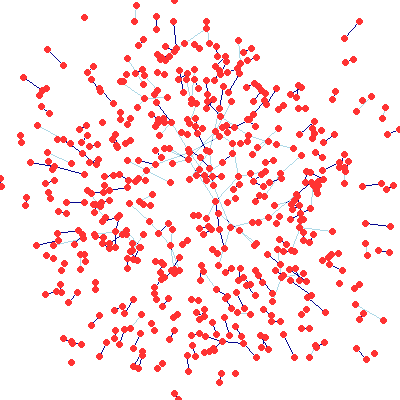

In [ ]:
create_plot_graph_force_directed(Gbi)

## Queer people out edges 

In [ ]:
dfout = pd.read_csv("queer_people_to_graph_dist1.csv")

In [ ]:
dfout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884872 entries, 0 to 884871
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   subject    884872 non-null  object 
 1   predicate  884872 non-null  object 
 2   object     884872 non-null  object 
 3   context    0 non-null       float64
dtypes: float64(1), object(3)
memory usage: 27.0+ MB


In [ ]:
print(dfout["subject"].nunique())
print(dfout["predicate"].nunique())
print(dfout["object"].nunique())

8171
4459
532651


In [ ]:
graph_statistics(GDiOut)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 540299
number of edges : 681887


In [ ]:
GDiOut = nx.from_pandas_edgelist(dfout, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)

In [ ]:
prune_dead_end(GDiOut)
graph_statistics(GDiOut)
prune_isolated_nodes(GDiOut)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 17041
number of edges : 1575
['o nyɛla Ireland yiliyiinda', 'http://www.wikidata.org/entity/Q2736', '2052', '322', 'http://www.wikidata.org/entity/Q592', 'http://www.wikidata.org/entity/Q20', '20', '3529', 'ممثل أيرلندي', '1978-04-01T00:00:00Z', 'http://www.wikidata.org/entity/Q1568372', 'http://www.wikidata.org/entity/Q859528', 'http://www.wikidata.org/entity/Q3354498', 'http://www.wikidata.org/entity/Q294', 'http://www.wikidata.org/entity/Q1412', 'http://www.wikidata.org/entity/Q7913', 'http://www.wikidata.org/entity/Q9309', 'http://www.wikidata.org/entity/Q143', '22141', 'http://www.wikidata.org/entity/Q161790', 'http://www.wikidata.org/entity/Q467265', 'http://www.wikidata.org/entity/Q4925623', 'http://www.wikidata.org/entity/Q14516546', 'americký politik', 'amerikanesche Politiker', 'politiko merikano', 'Olóṣèlú', 'سياسي أمريكي', 'yhdysvaltalainen poliitikko', 'politicien américain', 'politico statunitense', 'Amerikaans 

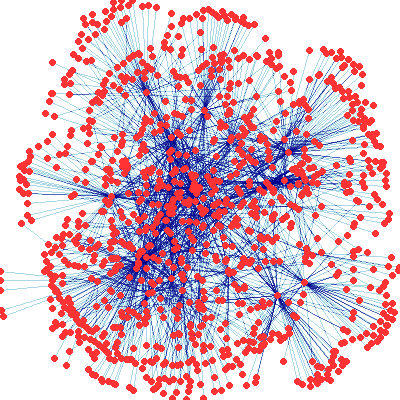

In [ ]:
create_plot_graph_force_directed(GDiOut)

In [ ]:
prune_dead_end(GDiOut)
graph_statistics(GDiOut)
prune_isolated_nodes(GDiOut)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 216
number of edges : 97
['http://www.wikidata.org/entity/Q6581097', 'http://www.wikidata.org/entity/Q67311526', 'http://www.wikidata.org/entity/Q1860', 'http://www.wikidata.org/entity/Q90', 'http://www.wikidata.org/entity/Q150', 'http://www.wikidata.org/entity/Q188', 'http://www.wikidata.org/entity/Q33999', 'http://www.wikidata.org/entity/Q145', 'http://www.wikidata.org/entity/Q36180', 'http://www.wikidata.org/entity/Q49757', 'ލިޔުންތެރިއެއް', 'http://www.wikidata.org/entity/Q60', 'http://www.wikidata.org/entity/Q245068', 'http://www.wikidata.org/entity/Q947873', 'http://www.wikidata.org/entity/Q1930187', 'http://www.wikidata.org/entity/Q10800557', 'http://www.wikidata.org/entity/Q177220', 'http://www.wikidata.org/entity/Q4610556', 'http://www.wikidata.org/entity/Q17172850', '23', 'http://www.wikidata.org/entity/Q37073', 'http://www.wikidata.org/entity/Q5994', 'http://www.wikidata.org/entity/Q36834', 'http://www.wikidata.org

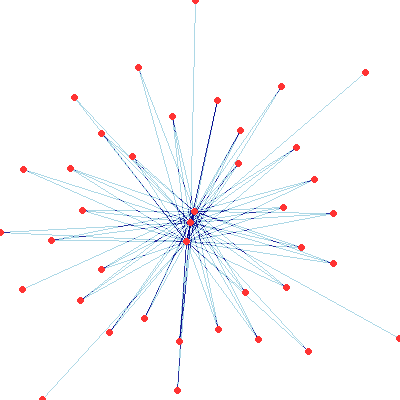

In [ ]:
create_plot_graph_force_directed(GDiOut)

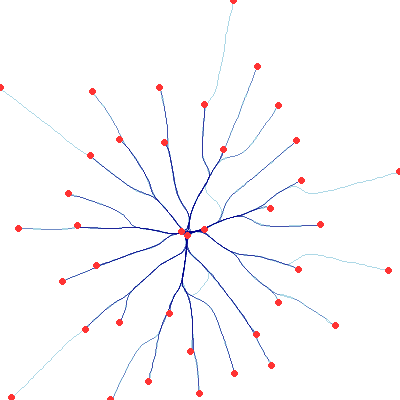

In [ ]:
create_plot_graph_force_directed_bundled(GDiOut)

In [ ]:
GDiOut.nodes

NodeView(('http://www.wikidata.org/entity/Q5', '36', '5', '4', 'http://www.wikidata.org/entity/Q106729628', '37', '2', 'http://www.wikidata.org/entity/Q71887839', 'http://www.wikidata.org/entity/Q35497', 'http://www.wikidata.org/entity/Q11772', 'antiker attisch-griechischer Vasenmaler des rotfigurigen Stils', 'http://www.wikidata.org/entity/Q486761', 'http://www.wikidata.org/entity/Q1747829', 'http://www.wikidata.org/entity/Q21282419', 'http://www.wikidata.org/entity/Q844930', 'http://www.wikidata.org/entity/Q15303045', 'http://www.wikidata.org/entity/Q731126', 'http://www.wikidata.org/entity/Q630974', 'http://www.wikidata.org/entity/Q704230', 'http://www.wikidata.org/entity/Q758170', 'http://www.wikidata.org/entity/Q19899872', '-0550-01-01T00:00:00Z', 'http://www.wikidata.org/entity/Q632355', 'Ancient attic-greek vase-painter of red-figure style', 'http://www.wikidata.org/entity/Q633683', 'http://www.wikidata.org/entity/Q35946093', 'http://www.wikidata.org/entity/Q19675', '-0499-01-01

In [ ]:
dfq5 = pd.read_csv("query(7).csv")

In [ ]:
dfq5["subject"].nunique()

50

In [ ]:
G50 = nx.from_pandas_edgelist(dfq5, source="subject", target="object", edge_key = "predicate", edge_attr="predicate", create_using=nx.DiGraph)

In [ ]:
graph_statistics(G50)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 6659
number of edges : 7217


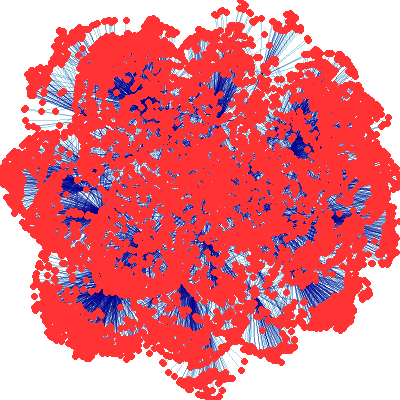

In [ ]:
create_plot_graph_force_directed(G50)

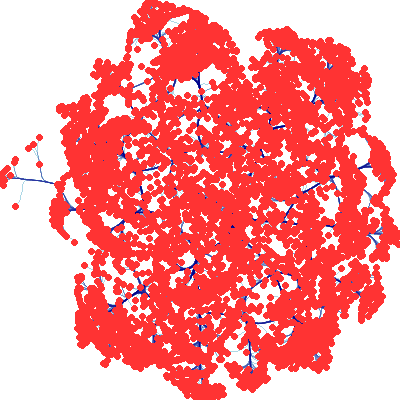

In [ ]:
create_plot_graph_force_directed_bundled(G50)

In [ ]:
prune_dead_end(G50)

In [ ]:
graph_statistics(G50)

<class 'networkx.classes.digraph.DiGraph'>
number of nodes : 204
number of edges : 0


In [ ]:
create_plot_graph_force_directed(G50)
#don't work because there is only individual nodes 

ValueError: ignored

# Recreating the graph for zoomed in purposes

In [ ]:
from utils import *

In [ ]:
from crawler import *

ModuleNotFoundError: ignored

In [ ]:
!pip install crawler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for crawler: filename=crawler-0.0.2-py3-none-any.whl size=9899 sha256=dc1d89e36bec8464668d0b8c1ab03bfb7907c11e979fe98715f2e5a2f3f034c3
  Stored in directory: /root/.cache/pip/wheels/81/15/e8/bfcc37824b04e1d32f81de7c870659ffd106430f6ad5896800
Successfully built crawler


In [ ]:
pip uninstall crawler

Found existing installation: crawler 0.0.2
Uninstalling crawler-0.0.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/crawler-0.0.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/crawler/*
    /usr/local/lib/python3.8/dist-packages/script/*
    /usr/local/lib/python3.8/dist-packages/test/*
Proceed (Y/n)? Y
  Successfully uninstalled crawler-0.0.2


In [ ]:
import queries

In [ ]:
import select_nodes 

In [ ]:
import visuals

In [ ]:
import crawler

In [ ]:
G = nx.Graph()
crawler.explore_selected(G, 50, )

In [ ]:
crawler.explore_selected

AttributeError: ignored

### testing on the star_merging pipeline 

In [ ]:
prune_policy = {'remove_deadend': False, "remove_isolated" : True }
G = star_merging_pipeline(10, prune_policy)

[]


In [ ]:
Gnodes = G.nodes()

In [ ]:
df = pd.DataFrame(data=Gnodes, columns=["nodes"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nodes   7666 non-null   object
dtypes: object(1)
memory usage: 60.0+ KB


In [ ]:
type(1)

int

In [ ]:
type(df["nodes"][0])

rdflib.term.URIRef

In [ ]:
df["types"] = df["nodes"].apply(lambda x :type(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nodes   7666 non-null   object
 1   types   7666 non-null   object
dtypes: object(2)
memory usage: 119.9+ KB


In [ ]:
df["types"].value_counts()

<class 'rdflib.term.URIRef'>     4648
<class 'rdflib.term.Literal'>    2308
<class 'rdflib.term.BNode'>       710
Name: types, dtype: int64

In [ ]:
df[:21]

nodes  \
0   http://www.wikidata.org/entity/statement/Q6630...   
1                  http://wikiba.se/ontology#BestRank   
2                http://www.wikidata.org/entity/P2168   
3   http://www.wikidata.org/prop/reference/value/P...   
4                   N265caf965f8a42a18d2c86639aece567   
5           http://www.w3.org/2002/07/owl#Restriction   
6                  http://www.wikidata.org/entity/P18   
7              http://wikiba.se/ontology#CommonsMedia   
8   http://www.wikidata.org/entity/statement/Q6987...   
9   http://commons.wikimedia.org/wiki/Special:File...   
10  http://www.wikidata.org/value/a8e6287fdf42c711...   
11                http://www.wikidata.org/entity/Q199   
12  http://www.wikidata.org/entity/statement/Q6882...   
13             http://www.wikidata.org/entity/Q472379   
14              http://www.wikidata.org/entity/Q68822   
15  http://www.wikidata.org/entity/statement/Q6882...   
16                  N7756db37a911404da62a9328e49b50da   
17  http://www.wikidata.org/entity/statement/q6882...   
18  http://www.wikidata.org/reference/fa278ebfc458...   
19              http://www.wikidata.org/entity/Q69638   
20                                     Therese Giehse   

                            types  
0    <class 'rdflib.term.URIRef'>  
1    <class 'rdflib.term.URIRef'>  
2    <class 'rdflib.term.URIRef'>  
3    <class 'rdflib.term.URIRef'>  
4     <class 'rdflib.term.BNode'>  
5    <class 'rdflib.term.URIRef'>  
6    <class 'rdflib.term.URIRef'>  
7    <class 'rdflib.term.URIRef'>  
8    <class 'rdflib.term.URIRef'>  
9    <class 'rdflib.term.URIRef'>  
10   <class 'rdflib.term.URIRef'>  
11   <class 'rdflib.term.URIRef'>  
12   <class 'rdflib.term.URIRef'>  
13   <class 'rdflib.term.URIRef'>  
14   <class 'rdflib.term.URIRef'>  
15   <class 'rdflib.term.URIRef'>  
16    <class 'rdflib.term.BNode'>  
17   <class 'rdflib.term.URIRef'>  
18   <class 'rdflib.term.URIRef'>  
19   <class 'rdflib.term.URIRef'>  
20  <class 'rdflib.term.Literal'>

In [ ]:
df["nodes"][0].n3()

'<http://www.wikidata.org/entity/statement/Q66303-83175A84-C2CE-4E48-98A6-6CA5301602C9>'

In [ ]:
df["nodes"][7].fragment

'CommonsMedia'

### After removing deadends

In [ ]:
def prune_literals(G):
  # remarque cela supprime aussi les Bnodes 
    to_suppr = []

    # Iterate through all nodes in the graph
    for node in G.nodes:
        if not ("http" in node):
            # If they are a not a link, add the node to the list of nodes to be removed
            to_suppr.append(node)

    # Iterate through the list of nodes to be removed
    for node in to_suppr:
        # Remove the node from the graph
        G.remove_node(node)
prune_literals(G)

In [ ]:
len(G.nodes())

4648

In [ ]:
prune_isolated_nodes(G)

[rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing')]


In [ ]:
len(G.nodes())

4646

In [ ]:
prune_dead_end(G)
len(G.nodes())

427

In [ ]:
df2 = pd.DataFrame(data=Gnodes, columns=["nodes"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nodes   427 non-null    object
dtypes: object(1)
memory usage: 3.5+ KB


In [ ]:
df2["types"] = df2["nodes"].apply(lambda x :type(x))

In [ ]:
df2["types"].value_counts()

<class 'rdflib.term.URIRef'>    427
Name: types, dtype: int64

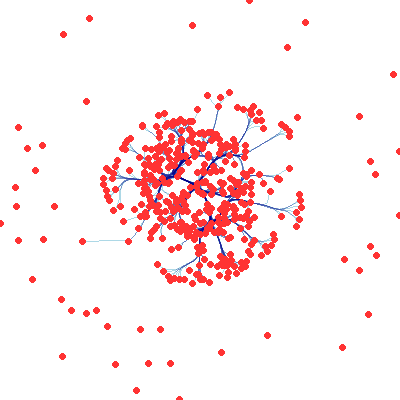

In [ ]:
from visuals import *
create_plot_graph_force_directed_bundled(G)

In [ ]:
from tqdm.notebook import tqdm
def is_instanceof_subclass(wiki_code_data, wiki_code_class):
    ask_query = "ASK {"+ wiki_code_data +" p:P31 ?statement0. ?statement0 (ps:P31/(wdt:P279*)) "+ wiki_code_class +".}"
    endpoint_url = "https://query.wikidata.org/sparql"
    headers = {'User-Agent': 'MyBot'}
    payload = {
            'query': ask_query,
            'format': 'json'
        }
    try :
      r = requests.get(endpoint_url, params=payload, headers=headers, timeout=5)
      return r.json()['boolean']
    except  requests.exceptions.Timeout:
      print("the request timed out")
      return None
    

def is_geographic_entity(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q27096213")

def is_person(wiki_code, with_wd=False):
    """from the wikipedia code returns whether the entity is a person or not"""
    if with_wd:
        code = wiki_code
    else : code = "wd:"+wiki_code
    ask_query = "ASK {"+ code +" wdt:P31 wd:Q5.}"
    endpoint_url = "https://query.wikidata.org/sparql"
    headers = {'User-Agent': 'MyBot'}
    payload = {
            'query': ask_query,
            'format': 'json'
        }
    try :
      r = requests.get(endpoint_url, params=payload, headers=headers, timeout=5)
      return r.json()['boolean']
    except  requests.exceptions.Timeout:
      print("the request timed out")
      return None
    

def is_temporal_entity(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q26907166")

def is_group_of_human(wiki_code_data, with_wd=False):
    if with_wd:
        code = wiki_code_data
    else : code = "wd:"+wiki_code_data
    return is_instanceof_subclass(code, "wd:Q16334295")

class_value_to_type = ["not wikidata", "person", "geographic entity", "temporal entity", "group of humans", "other"]
def get_type_from_value(n):
    return class_value_to_type[n]

def get_code_from_node(node, with_wd):
  value = 0       
  #get the wikicode
  node_code = node.n3()
  found = False
  for num, funct in enumerate([is_person, is_geographic_entity, is_temporal_entity, is_group_of_human]):
      res = funct(node_code, with_wd)
      if not(res is None) and res:
          value = num + 1
          break
  return value

def create_classified_nodes(list_of_nodes, with_wd=True):
    """ relations 
        0: not wikidata
        1: person 
        2 : geographic entity
        3 : temporal entity
        4 : group of human
        5 : other"""
    node_class = []
    for node in tqdm(list_of_nodes):
        value = get_code_from_node(node, with_wd)
        #print(value)
        node_class.append(value)
    return node_class

remarque : ci dessous on utilise Gnodes directement car on a uniquement les noeuds wikidataentities qui restent 

In [ ]:
create_classified_nodes(list(Gnodes))

  0%|          | 0/427 [00:00<?, ?it/s]

0
0
0
0
the request timed out
the request timed out
the request timed out
0
the request timed out
0
1
0
1
1
0
the request timed out
0


JSONDecodeError: ignored

In [ ]:
node_class = create_classified_nodes(list(Gnodes))

  0%|          | 0/427 [00:00<?, ?it/s]

the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the request timed out
the reques

In [ ]:
len(node_class)

427

In [ ]:
df2["class_entity"] = node_class

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df2.to_csv("gdrive/MyDrive/nodes_of_merging_star_graph_with_types.csv")

In [ ]:
df2["class_entity"].value_counts()

0    400
1     14
2     13
Name: class_entity, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodes         427 non-null    object
 1   types         427 non-null    object
 2   class_entity  427 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ KB


In [ ]:
df2.loc[df2["class_entity"] == 1]

nodes                         types  \
6      http://www.wikidata.org/entity/Q68822  <class 'rdflib.term.URIRef'>   
8      http://www.wikidata.org/entity/Q69638  <class 'rdflib.term.URIRef'>   
9      http://www.wikidata.org/entity/Q69810  <class 'rdflib.term.URIRef'>   
13     http://www.wikidata.org/entity/Q69870  <class 'rdflib.term.URIRef'>   
16     http://www.wikidata.org/entity/Q68855  <class 'rdflib.term.URIRef'>   
21     http://www.wikidata.org/entity/Q69022  <class 'rdflib.term.URIRef'>   
24     http://www.wikidata.org/entity/Q66843  <class 'rdflib.term.URIRef'>   
28   http://www.wikidata.org/entity/Q1806197  <class 'rdflib.term.URIRef'>   
32     http://www.wikidata.org/entity/Q66303  <class 'rdflib.term.URIRef'>   
41     http://www.wikidata.org/entity/Q68486  <class 'rdflib.term.URIRef'>   
83     http://www.wikidata.org/entity/Q66025  <class 'rdflib.term.URIRef'>   
214    http://www.wikidata.org/entity/Q61597  <class 'rdflib.term.URIRef'>   
311    http://www.wikidata.org/entity/Q84510  <class 'rdflib.term.URIRef'>   
319  http://www.wikidata.org/entity/Q6237529  <class 'rdflib.term.URIRef'>   

     class_entity  
6               1  
8               1  
9               1  
13              1  
16              1  
21              1  
24              1  
28              1  
32              1  
41              1  
83              1  
214             1  
311             1  
319             1

In [ ]:
df2.loc[df2["class_entity"] == 2]

nodes                         types  \
53   http://www.wikidata.org/entity/Q42184862  <class 'rdflib.term.URIRef'>   
96   http://www.wikidata.org/entity/Q51955019  <class 'rdflib.term.URIRef'>   
117    http://www.wikidata.org/entity/Q680772  <class 'rdflib.term.URIRef'>   
118      http://www.wikidata.org/entity/Q1198  <class 'rdflib.term.URIRef'>   
123    http://www.wikidata.org/entity/Q155354  <class 'rdflib.term.URIRef'>   
125      http://www.wikidata.org/entity/Q2758  <class 'rdflib.term.URIRef'>   
129  http://www.wikidata.org/entity/Q50920401  <class 'rdflib.term.URIRef'>   
144    http://www.wikidata.org/entity/Q152087  <class 'rdflib.term.URIRef'>   
164   http://www.wikidata.org/entity/Q2107507  <class 'rdflib.term.URIRef'>   
183    http://www.wikidata.org/entity/Q881481  <class 'rdflib.term.URIRef'>   
324      http://www.wikidata.org/entity/Q3050  <class 'rdflib.term.URIRef'>   
367     http://www.wikidata.org/entity/Q27265  <class 'rdflib.term.URIRef'>   
396      http://www.wikidata.org/entity/Q2765  <class 'rdflib.term.URIRef'>   

     class_entity  
53              2  
96              2  
117             2  
118             2  
123             2  
125             2  
129             2  
144             2  
164             2  
183             2  
324             2  
367             2  
396             2

In [ ]:
df2.head()

nodes  \
0                 http://wikiba.se/ontology#BestRank   
1             http://wikiba.se/ontology#CommonsMedia   
2  http://commons.wikimedia.org/wiki/Special:File...   
3  http://www.wikidata.org/value/a8e6287fdf42c711...   
4                http://www.wikidata.org/entity/Q199   

                          types  class_entity  
0  <class 'rdflib.term.URIRef'>             0  
1  <class 'rdflib.term.URIRef'>             0  
2  <class 'rdflib.term.URIRef'>             0  
3  <class 'rdflib.term.URIRef'>             0  
4  <class 'rdflib.term.URIRef'>             0

(array([413.,   9.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  18.2,  36.4,  54.6,  72.8,  91. , 109.2, 127.4, 145.6,
        163.8, 182. ]),
 <BarContainer object of 10 artists>)

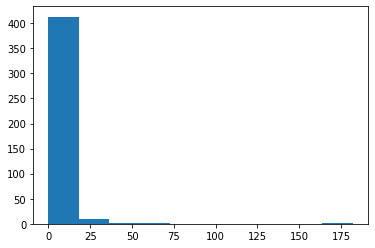

In [ ]:
## trying to find the nodes that are central 
degrees_dic = G.degree()
degree_values = np.array([v for k, v in degrees_dic])
fig = plt.figure();
#plt.boxplot(degree_values)
plt.hist(degree_values)

In [ ]:
degree_values.mean()

3.306791569086651

In [ ]:
degree_values.max()

182

### adding the colors

### produce a zoomed in version of the graph 

In [ ]:
def from_node_get_name(iri):
  query = """SElECT ?item ?itemLabel  WHERE{
  BIND(<""" + iri +"""> as ?item).
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  } """
  endpoint_url = "https://query.wikidata.org/sparql"
  headers = {'User-Agent': 'MyBot'}
  payload = {
          'query': query,
          'format': 'json'
      }
  try :
    r = requests.get(endpoint_url, params=payload, headers=headers, timeout=5)
    return r.json()["results"]["bindings"][0]["itemLabel"]['value']
  except  requests.exceptions.Timeout:
    print("the request timed out")
    return None

In [ ]:
r = from_node_get_name("http://www.wikidata.org/entity/Q3050")
r

{'head': {'vars': ['item', 'itemLabel']},
 'results': {'bindings': [{'item': {'type': 'uri',
     'value': 'http://www.wikidata.org/entity/Q3050'},
    'itemLabel': {'xml:lang': 'en',
     'type': 'literal',
     'value': 'Recklinghausen'}}]}}

In [ ]:
r["results"]["bindings"][0]["itemLabel"]['value']

'Recklinghausen'

In [ ]:
from_node_get_name("http://www.wikidata.org/entity/Q2765")

'Gelsenkirchen'

In [ ]:
import numpy as np

df2["label"] = np.nan

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodes         427 non-null    object 
 1   types         427 non-null    object 
 2   class_entity  427 non-null    int64  
 3   label         0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.5+ KB


In [ ]:
def get_name_df(df):
  #print(df)
  #print(df["label"])
  if df["class_entity"] > 0:
    return from_node_get_name(df["nodes"])
  else :
    return None

In [ ]:
df2.iloc[0]["label"]

nan

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodes         427 non-null    object 
 1   types         427 non-null    object 
 2   class_entity  427 non-null    int64  
 3   label         0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.5+ KB


In [ ]:
df2["label"] = df2.apply(get_name_df, axis = 1)

  BIND(<http://www.wikidata.org/entity/Q68822 does not look like a valid URI, trying to serialize this will break.
  BIND(<http://www.wikidata.org/entity/Q68822> as ?item).
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  }  does not look like a valid URI, trying to serialize this will break.
  BIND(<http://www.wikidata.org/entity/Q69638 does not look like a valid URI, trying to serialize this will break.
  BIND(<http://www.wikidata.org/entity/Q69638> as ?item).
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  }  does not look like a valid URI, trying to serialize this will break.
  BIND(<http://www.wikidata.org/entity/Q69810 does not look like a valid URI, trying to serialize this will break.
  BIND(<http://www.wikidata.org/entity/Q69810> as ?item).
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
  }  does not look like a valid URI, trying to serialize this will break.
  BI

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodes         427 non-null    object
 1   types         427 non-null    object
 2   class_entity  427 non-null    int64 
 3   label         27 non-null     object
dtypes: int64(1), object(3)
memory usage: 13.5+ KB


In [ ]:
df2.loc[df2["label"].notnull()]

nodes                         types  \
6       http://www.wikidata.org/entity/Q68822  <class 'rdflib.term.URIRef'>   
8       http://www.wikidata.org/entity/Q69638  <class 'rdflib.term.URIRef'>   
9       http://www.wikidata.org/entity/Q69810  <class 'rdflib.term.URIRef'>   
13      http://www.wikidata.org/entity/Q69870  <class 'rdflib.term.URIRef'>   
16      http://www.wikidata.org/entity/Q68855  <class 'rdflib.term.URIRef'>   
21      http://www.wikidata.org/entity/Q69022  <class 'rdflib.term.URIRef'>   
24      http://www.wikidata.org/entity/Q66843  <class 'rdflib.term.URIRef'>   
28    http://www.wikidata.org/entity/Q1806197  <class 'rdflib.term.URIRef'>   
32      http://www.wikidata.org/entity/Q66303  <class 'rdflib.term.URIRef'>   
41      http://www.wikidata.org/entity/Q68486  <class 'rdflib.term.URIRef'>   
53   http://www.wikidata.org/entity/Q42184862  <class 'rdflib.term.URIRef'>   
83      http://www.wikidata.org/entity/Q66025  <class 'rdflib.term.URIRef'>   
96   http://www.wikidata.org/entity/Q51955019  <class 'rdflib.term.URIRef'>   
117    http://www.wikidata.org/entity/Q680772  <class 'rdflib.term.URIRef'>   
118      http://www.wikidata.org/entity/Q1198  <class 'rdflib.term.URIRef'>   
123    http://www.wikidata.org/entity/Q155354  <class 'rdflib.term.URIRef'>   
125      http://www.wikidata.org/entity/Q2758  <class 'rdflib.term.URIRef'>   
129  http://www.wikidata.org/entity/Q50920401  <class 'rdflib.term.URIRef'>   
144    http://www.wikidata.org/entity/Q152087  <class 'rdflib.term.URIRef'>   
164   http://www.wikidata.org/entity/Q2107507  <class 'rdflib.term.URIRef'>   
183    http://www.wikidata.org/entity/Q881481  <class 'rdflib.term.URIRef'>   
214     http://www.wikidata.org/entity/Q61597  <class 'rdflib.term.URIRef'>   
311     http://www.wikidata.org/entity/Q84510  <class 'rdflib.term.URIRef'>   
319   http://www.wikidata.org/entity/Q6237529  <class 'rdflib.term.URIRef'>   
324      http://www.wikidata.org/entity/Q3050  <class 'rdflib.term.URIRef'>   
367     http://www.wikidata.org/entity/Q27265  <class 'rdflib.term.URIRef'>   
396      http://www.wikidata.org/entity/Q2765  <class 'rdflib.term.URIRef'>   

     class_entity                                              label  
6               1                                     Hape Kerkeling  
8               1                                     Therese Giehse  
9               1                                       Monika Treut  
13              1                                     Claire Waldoff  
16              1                                Marco Kreuzpaintner  
21              1                       Jean Baptista von Schweitzer  
24              1                               Brigitte Fassbaender  
28              1                                      Sabine Peters  
32              1                                        Ursula Holl  
41              1                            Charlotte von Mahlsdorf  
53              2                             Waldfriedhof Mahlsdorf  
83              1                                     Imke Duplitzer  
96              2                               BEIC Digital Library  
117             2                                          Giessbach  
118             2                             North Rhine-Westphalia  
123             2                              University of Marburg  
125             2                                    Mönchengladbach  
129             2  SAPA Foundation, Swiss Archive of the Performi...  
144             2                      Humboldt University of Berlin  
164             2                             Pragfriedhof Stuttgart  
183             2                            Frankfurt Main Cemetery  
214             1                                         Erika Mann  
311             1                          Willi Domgraf-Fassbaender  
319             1                                       John Hampson  
324             2                                   

## adding some colors

we already have the nodes dataframe (df2)





In [ ]:
G.edges()

OutMultiEdgeDataView([(rdflib.term.URIRef('http://www.wikidata.org/value/a8e6287fdf42c7112c80e08f6e3f9314'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q199')), (rdflib.term.URIRef('http://www.wikidata.org/value/a8e6287fdf42c7112c80e08f6e3f9314'), rdflib.term.URIRef('http://wikiba.se/ontology#QuantityValue')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q472379'), rdflib.term.URIRef('http://wikiba.se/ontology#Item')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'), rdflib.term.URIRef('http://www.hapekerkeling.de/')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'), rdflib.term.URIRef('http://id.ndl.go.jp/auth/ndlna/01203923')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q1786936')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'), rdflib.term.URIRef('http://www.wikidata.org/entity/Q10800557')), (rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'), rdflib

In [ ]:
#create the edges
edges_df = pd.DataFrame([[u, v] for u, v in G.edges()], columns=['source', 'target'])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

import datashader as ds
import datashader.transfer_functions as tf
from datashader.layout import random_layout, circular_layout, forceatlas2_layout
from datashader.bundling import connect_edges, hammer_bundle

from itertools import chain

import scipy

In [ ]:
edges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  706 non-null    object
 1   target  706 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


In [ ]:
forcedirected = forceatlas2_layout(df2, edges_df)

ValueError: ignored

In [ ]:
# plot the force-directed graph
force_graph = graphplot(forcedirected, hammer_bundle(forcedirected,edges), "Force-directed, bundled") 


AttributeError: ignored

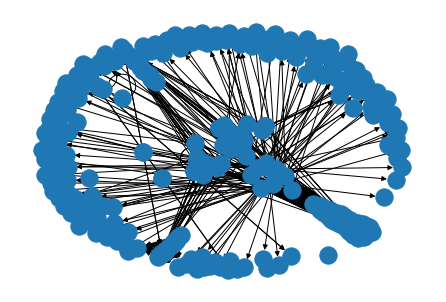

In [ ]:
nx.draw(G)

In [ ]:
PG = nx.nx_pydot.to_pydot(G)

<ipython-input-173-57dc1c8d76dd>:1: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  PG = nx.nx_pydot.to_pydot(G)


ValueError: ignored

adapter nos superbes noeuds à networkx : le dictionnaire

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nodes         427 non-null    object
 1   types         427 non-null    object
 2   class_entity  427 non-null    int64 
 3   label         27 non-null     object
dtypes: int64(1), object(3)
memory usage: 13.5+ KB


In [ ]:
labels = dict({row["nodes"] : row["label"] for index, row in df2.loc[df2["class_entity"] > 0].iterrows()})

In [ ]:
labels = dict({row["nodes"] : row["label"] for index, row in df2.loc[df2["class_entity"] > 0].iterrows()})
color_lookup = dict({row["nodes"] : row["class_entity"] for index, row in df2.iterrows()})

In [ ]:
len(labels)

27

In [ ]:
labels

{rdflib.term.URIRef('http://www.wikidata.org/entity/Q68822'): 'Hape Kerkeling',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q69638'): 'Therese Giehse',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q69810'): 'Monika Treut',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q69870'): 'Claire Waldoff',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q68855'): 'Marco Kreuzpaintner',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q69022'): 'Jean Baptista von Schweitzer',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q66843'): 'Brigitte Fassbaender',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q1806197'): 'Sabine Peters',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q66303'): 'Ursula Holl',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q68486'): 'Charlotte von Mahlsdorf',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q42184862'): 'Waldfriedhof Mahlsdorf',
 rdflib.term.URIRef('http://www.wikidata.org/entity/Q66025'): 'Imke Duplitzer',

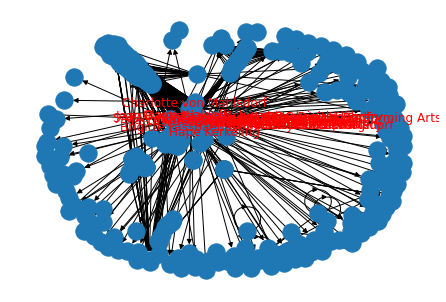

In [ ]:
nx.draw(G, pos=nx.spring_layout(G))
labelsG = nx.draw_networkx_labels(G, pos=nx.spring_layout(G), font_color='r', labels=labels)

In [ ]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx

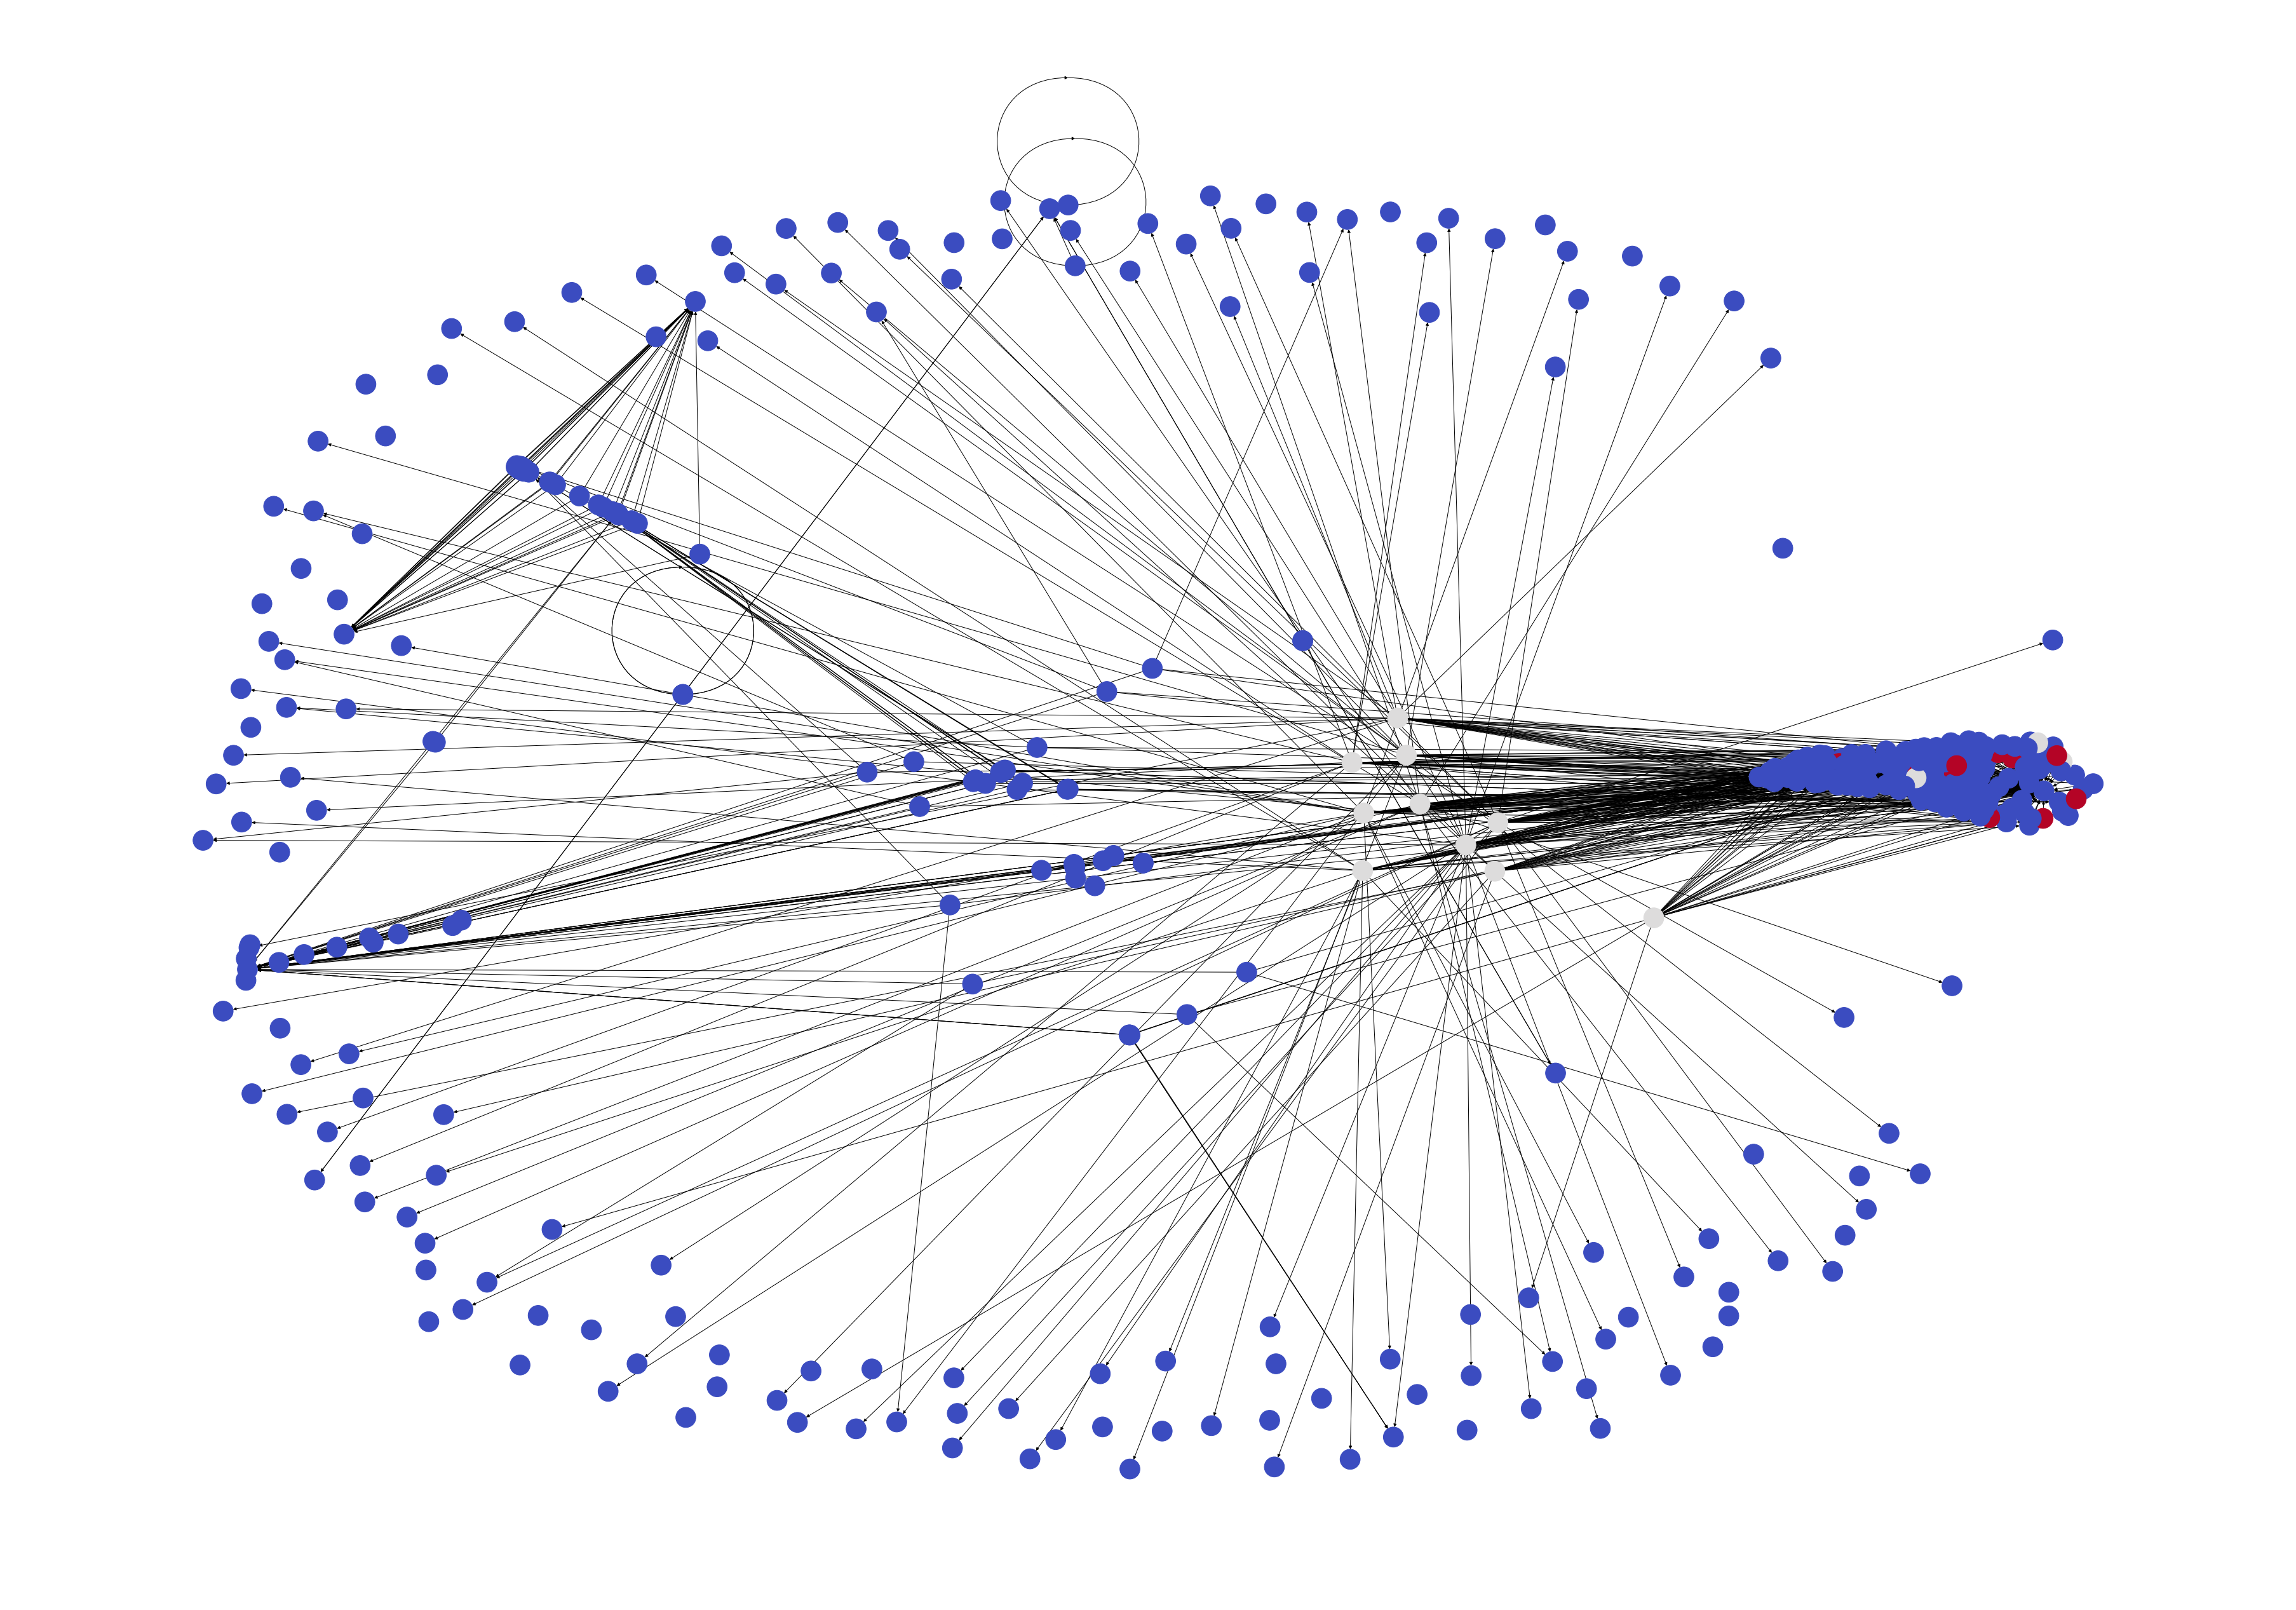

In [ ]:
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 50, 35
nx.draw(G, 
        nodelist=color_lookup,
        node_size=1000,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
plt.show()

TypeError: ignored

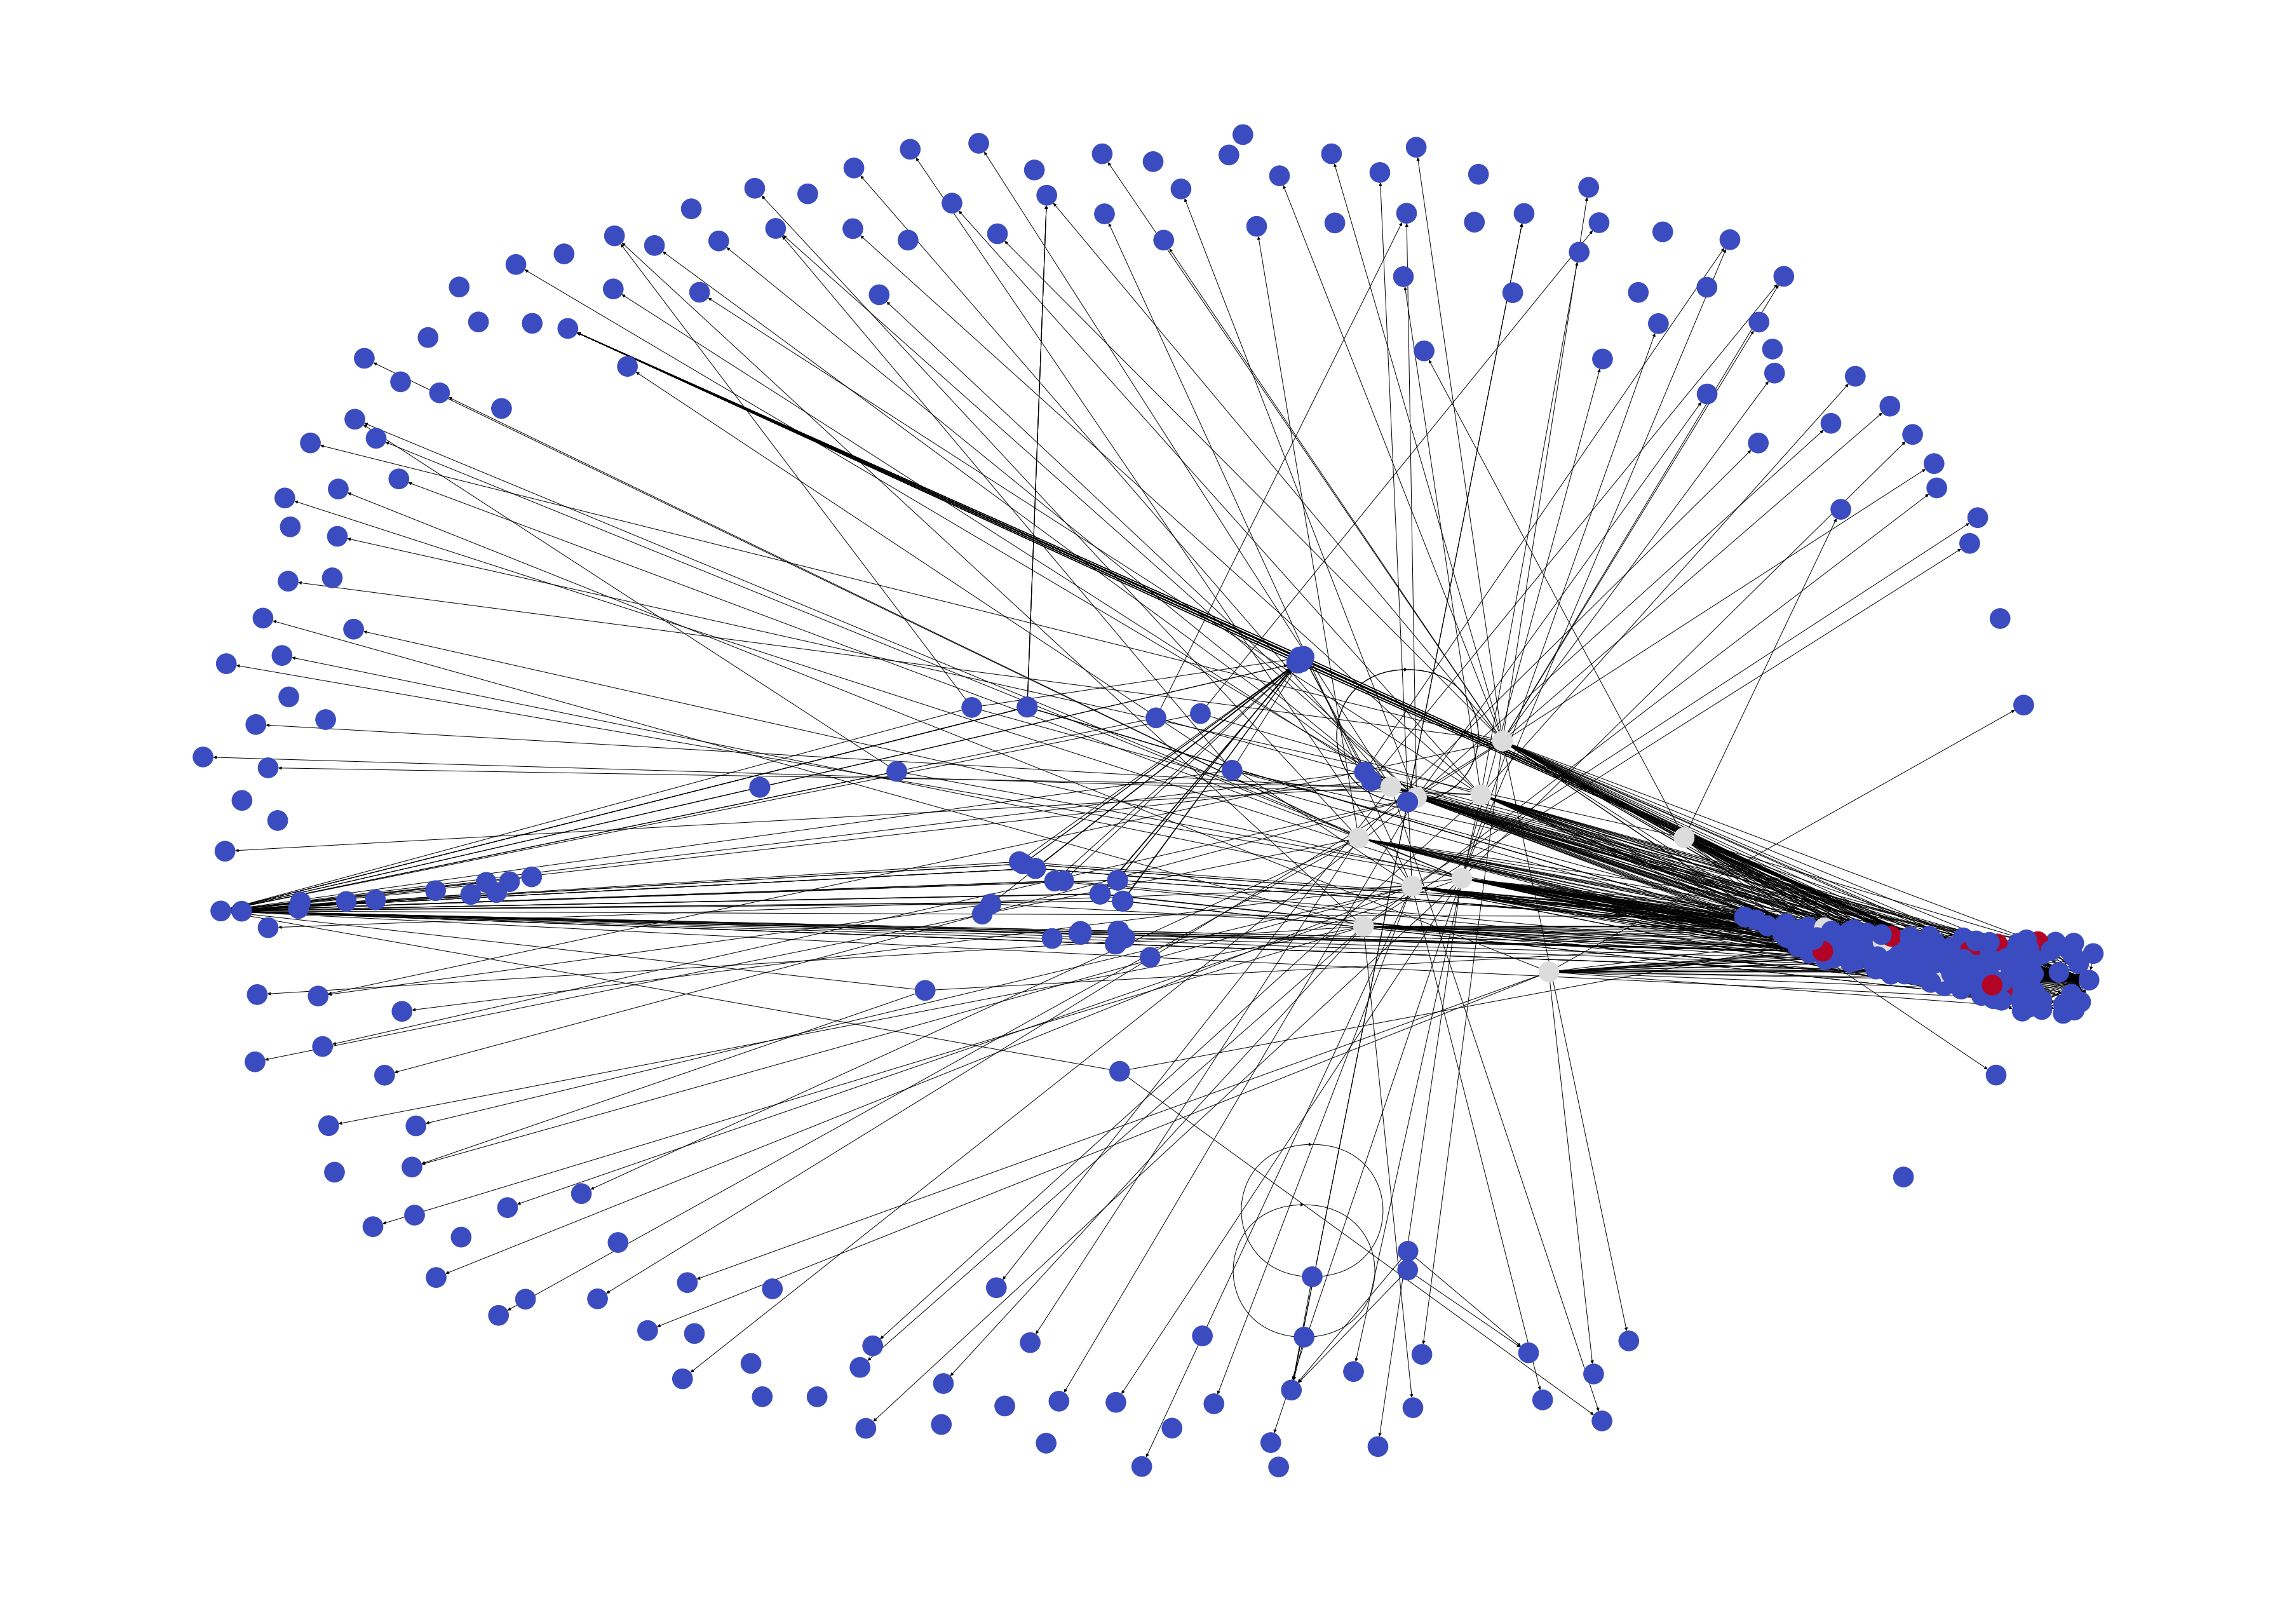

In [ ]:
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

rcParams['figure.figsize'] = 50, 35
nx.draw(G, 
        nodelist=color_lookup,
        node_size=1000,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False)
nx.draw_networkx_labels(G, font_color='g', pos= , labels=labels)
plt.show()

In [ ]:
def create_plot_graph_force_directed(G):
    # convert the graph labels to integers
    g=convert_to_int_labels(nx.DiGraph(G))

    # create a dataframe of nodes with a 'name' column
    nodes = pd.DataFrame([str(i) for i in g.nodes], columns=['name'])
    # create a list of edges
    ledge=[]
    for u,v in g.edges:
        ledge.append([u,v])
    # create a dataframe of edges with 'source' and 'target' columns
    edges = pd.DataFrame(ledge,columns=['source', 'target'])

    # create a force-directed layout of the graph
    forcedirected = forceatlas2_layout(nodes, edges)
    force_graph = graphplot(forcedirected, connect_edges(forcedirected,edges), "Force-directed") 

    return forcegraph

In [ ]:
create_plot_graph_force_directed(G)

name         x         y
0      0  1.544690  0.450526
1      1  0.408815  1.483435
2      2  0.269649  0.926278
3      3  1.042614  0.059364
4      4  0.941225  0.171250
..   ...       ...       ...
422  422  0.679137  0.985111
423  423  0.228371  0.812664
424  424  0.333239  0.962668
425  425  0.879786  0.497254
426  426  0.534763  0.037356

[427 rows x 3 columns]

In [ ]:
df3 = pd.read_csv("gdrive/MyDrive/nodes_of_merging_star_graph_with_types.csv")
df3.head()

Unnamed: 0                                              nodes  \
0           0                 http://wikiba.se/ontology#BestRank   
1           1             http://wikiba.se/ontology#CommonsMedia   
2           2  http://commons.wikimedia.org/wiki/Special:File...   
3           3  http://www.wikidata.org/value/a8e6287fdf42c711...   
4           4                http://www.wikidata.org/entity/Q199   

                          types  class_entity label  
0  <class 'rdflib.term.URIRef'>             0   NaN  
1  <class 'rdflib.term.URIRef'>             0   NaN  
2  <class 'rdflib.term.URIRef'>             0   NaN  
3  <class 'rdflib.term.URIRef'>             0   NaN  
4  <class 'rdflib.term.URIRef'>             0   NaN

# Pretty zoomed in and easier 

In [ ]:
prune_policy = {'remove_deadend': False, "remove_isolated" : True }
Geasy =  star_merging_pipeline(2, prune_policy)

[]


In [ ]:
len(Geasy.nodes()), len(Geasy.edges())

(1698, 3931)

In [ ]:
def create_df_with_types(G):
  df_nodes = pd.DataFrame(data=G.nodes(), columns=["node"])
  df_nodes["rdf_type"] = df_nodes["node"].apply(lambda x :type(x))
  #df_nodes["data_label"] = df_nodes["node"].apply()
  return df_nodes

In [ ]:
dfeasy = create_df_with_types(Geasy)

In [ ]:
dfeasy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   node      1698 non-null   object
 1   rdf_type  1698 non-null   object
dtypes: object(2)
memory usage: 26.7+ KB


In [ ]:
dfeasy["rdf_type"].value_counts()

<class 'rdflib.term.URIRef'>     1144
<class 'rdflib.term.Literal'>     456
<class 'rdflib.term.BNode'>        98
Name: rdf_type, dtype: int64

In [ ]:
prune_dead_end(G)

In [ ]:
dfeasy2 = create_df_with_types(G)

In [ ]:
dfeasy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   node      56 non-null     object
 1   rdf_type  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [ ]:
dfeasy2["rdf_type"].value_counts()

<class 'rdflib.term.URIRef'>    56
Name: rdf_type, dtype: int64

question : en voyant ces resultats quel est la pertinence des noeuds blancs : puisqu'ici ils sont des dead ends, donc sont supprimés

In [ ]:
dfeasy2["label"] = dfeasy2["node"].apply(lambda x : from_node_get_name(x.n3()))

JSONDecodeError: ignored

In [ ]:
dfeasy2["data_type"] = create_classified_nodes(dfeasy2["node"])

  0%|          | 0/56 [00:00<?, ?it/s]

the request timed out


KeyboardInterrupt: ignored

In [ ]:
def conditioned_get_label(node):
  if type(node) == rdflib.term.URIRef:
    return get_label